<a href="https://colab.research.google.com/github/mbashish007/Ashish1/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec  as gridspec
import matplotlib.ticker as mticker
import warnings
from IPython.display import display, HTML
import ipaddress
import json

# Suppress all warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
pd.set_option('display.expand_frame_repr', False)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_df_path = '/content/drive/MyDrive/MLP/transformed_train_df.csv'
test_df_path = '/content/drive/MyDrive/MLP/transformed_test_df.csv'
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
#
print(train_df.shape)
print(test_df.shape)

print(train_df.head())
print(test_df.head())

(313627, 21)
(78407, 21)
   FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  FAMD_Component_9  FAMD_Component_10  FAMD_Component_11  FAMD_Component_12  FAMD_Component_13  FAMD_Component_14  FAMD_Component_15  FAMD_Component_16  FAMD_Component_17  FAMD_Component_18  FAMD_Component_19  FAMD_Component_20   Label
0          1.159860         -1.137678          4.466658          1.470095         -0.084904          2.158798         -2.801462          0.754955         -0.664978          -0.576842           0.671979           0.078739           0.060634           0.068731           0.664680          -0.113278          -0.066584           0.333080           0.174933           0.159136  Benign
1          1.149460         -1.188577         -7.934534          8.735732          3.640803         -1.384045         -2.374773         -0.234244          0.346913           0.314857          -0.499535          -0

In [8]:
ransomware_palette = sns.color_palette("Set1", 11)

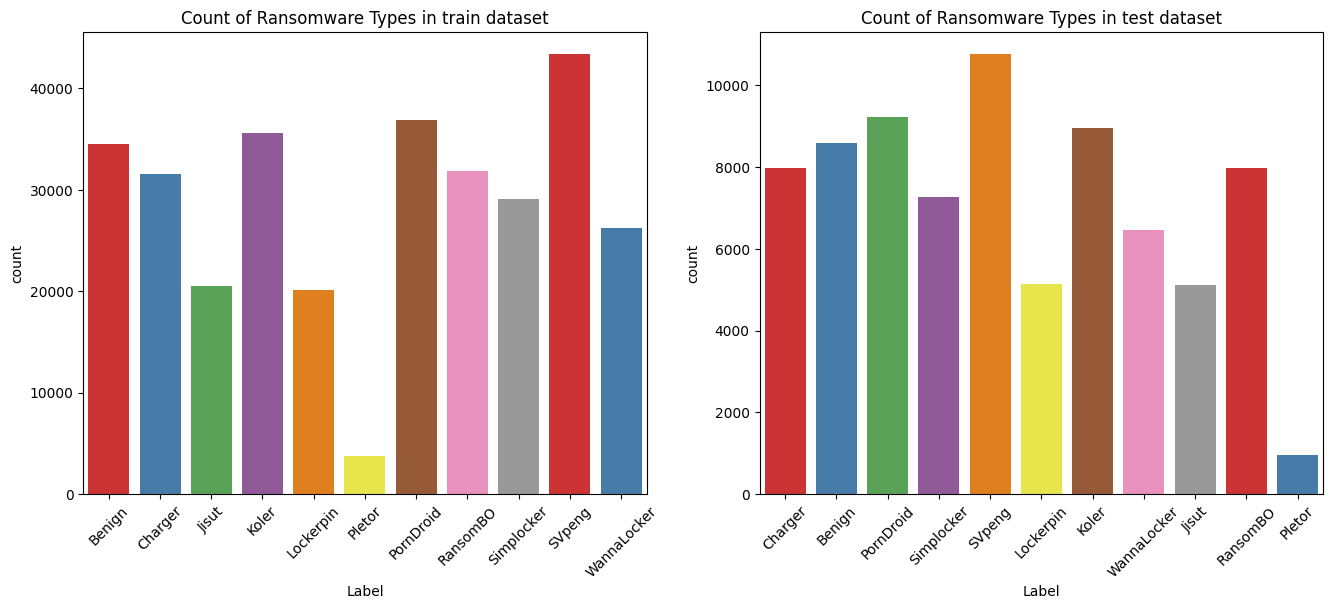

In [9]:
# plt.figure(figsize=(8, 6))
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=train_df, x='Label', ax = axes[0], palette=ransomware_palette)
axes[0].set_title('Count of Ransomware Types in train dataset')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(data=test_df, x='Label', ax = axes[1], palette=ransomware_palette)
axes[1].set_title('Count of Ransomware Types in test dataset')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.show()

In [10]:
combined_df = pd.concat([train_df, test_df], axis=0)
print(combined_df.shape)
print(combined_df.head())

(392034, 21)
   FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  FAMD_Component_9  FAMD_Component_10  FAMD_Component_11  FAMD_Component_12  FAMD_Component_13  FAMD_Component_14  FAMD_Component_15  FAMD_Component_16  FAMD_Component_17  FAMD_Component_18  FAMD_Component_19  FAMD_Component_20   Label
0          1.159860         -1.137678          4.466658          1.470095         -0.084904          2.158798         -2.801462          0.754955         -0.664978          -0.576842           0.671979           0.078739           0.060634           0.068731           0.664680          -0.113278          -0.066584           0.333080           0.174933           0.159136  Benign
1          1.149460         -1.188577         -7.934534          8.735732          3.640803         -1.384045         -2.374773         -0.234244          0.346913           0.314857          -0.499535          -0.101929     

In [11]:
#one hot encode categorical cols
def OneHotEncode(df, cols) :
  new_col_names = []
  for col in cols :
    unique = df[col].unique()
    for u in unique :
      new_col_name = col + '_' + str(u)
      new_col_names.append(new_col_name)
      df[new_col_name] = (df[col] == u).astype(int)
    df.drop(col, axis =1,inplace=True)
  return new_col_names

Label_cols_oh = OneHotEncode(combined_df,['Label'])
print(combined_df.head(10))

   FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  FAMD_Component_9  FAMD_Component_10  FAMD_Component_11  FAMD_Component_12  FAMD_Component_13  FAMD_Component_14  FAMD_Component_15  FAMD_Component_16  FAMD_Component_17  FAMD_Component_18  FAMD_Component_19  FAMD_Component_20  Label_Benign  Label_Charger  Label_Jisut  Label_Koler  Label_Lockerpin  Label_Pletor  Label_PornDroid  Label_RansomBO  Label_Simplocker  Label_SVpeng  Label_WannaLocker
0          1.159860         -1.137678          4.466658          1.470095         -0.084904          2.158798         -2.801462          0.754955         -0.664978          -0.576842           0.671979           0.078739           0.060634           0.068731           0.664680          -0.113278          -0.066584           0.333080           0.174933           0.159136             1              0            0            0                0             

In [29]:
train_df = combined_df.iloc[:len(train_df)]
test_df = combined_df.iloc[len(train_df):]
print(train_df.shape)
print(test_df.shape)
#

(313627, 31)
(78407, 31)


In [30]:
print(type(X_train))
print(type(Y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
Label_cols_oh

['Label_Benign',
 'Label_Charger',
 'Label_Jisut',
 'Label_Koler',
 'Label_Lockerpin',
 'Label_Pletor',
 'Label_PornDroid',
 'Label_RansomBO',
 'Label_Simplocker',
 'Label_SVpeng',
 'Label_WannaLocker']

In [22]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(train_df.head())

   FAMD_Component_1  FAMD_Component_2  FAMD_Component_3  FAMD_Component_4  FAMD_Component_5  FAMD_Component_6  FAMD_Component_7  FAMD_Component_8  FAMD_Component_9  FAMD_Component_10  FAMD_Component_11  FAMD_Component_12  FAMD_Component_13  FAMD_Component_14  FAMD_Component_15  FAMD_Component_16  FAMD_Component_17  FAMD_Component_18  FAMD_Component_19  FAMD_Component_20  Label_Benign  Label_Charger  Label_Jisut  Label_Koler  Label_Lockerpin  Label_Pletor  Label_PornDroid  Label_RansomBO  Label_Simplocker  Label_SVpeng  Label_WannaLocker
0          1.164051         -1.182137         -7.955448          8.796089          3.819738         -0.980654         -2.249132         -0.180714          0.022396           0.014962          -0.609386          -0.259632          -0.047296           0.384985           0.525544           1.426168          -0.679061          -0.559363          -0.483139          -0.084667             0              0            0            0                0             

In [28]:
X_train = train_df.drop(columns=Label_cols_oh)
Y_train = train_df[Label_cols_oh]
X_test = test_df.drop(columns=Label_cols_oh)
Y_test = test_df[Label_cols_oh]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

#

(313627, 20)
(313627, 11)
(78407, 20)
(78407, 11)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [31]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [24]:
def cost_function(a2, y):
    m = y.shape[0]

    cost = -(1/m)*np.sum(y*np.log(a2))

    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))

    return cost

In [57]:
# m = X_train.shape[0]
m = 1
print(m)

def init_params():
    W1 = np.random.rand( 20, 128) * 0.01
    b1 = np.random.rand(128, 1) * 0.01
    W2 = np.random.rand(128, 11) * 0.01
    b2 = np.random.rand(11, 1) * 0.01
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.T.dot(X) + b1
    # print(f"Shape of Z1: {Z1.shape}")
    # print(f"Shape of W1: {W1.shape}")
    # print(f"Shape of X: {X.shape}")
    # print(f"Shape of b1: {b1.shape}")
    A1 = ReLU(Z1)
    # print(f"Shape of A1: {A1.shape}")
    Z2 = W2.T.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return np.where(Z > 0, 1, 0)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # one_hot_Y = one_hot(Y)
    dZ2 = A2 - Y
    # print(f"Shape of dZ2: {dZ2.shape}")
    # print(f"Shape of A1: {A1.shape}")
    # print(f"Shape of W2: {W2.shape}")
    # print(f"Shape of Z1: {Z1.shape}")
    # dW2 = 1 / m * dZ2.dot(A1.T)
    dW2 = 1 / m * A1.dot(dZ2.T)

    # print(f"Shape of dW2: {dW2.shape}")
    # dW2 = 1/m * A1.dot(dZ2)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1)
    # dZ1 = dZ2.dot(W2.T) * ReLU_deriv(Z1)
    dW1 = 1 / m * X.dot(dZ1.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

1


In [65]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations, cost_list = []):
    W1, b1, W2, b2 = init_params()
    for i in range(X.shape[1]):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X[:, i].reshape(-1, 1))
        predicted_class = np.argmax(A2)
        actual_class = np.argmax(Y[:, i].reshape(-1, 1))
        # print(f"Predicted Class: {predicted_class}, Actual Class: {actual_class}")

        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X[:, i].reshape(-1, 1), Y[:, i].reshape(-1, 1))
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
          # print(A2,Y[:, i].reshape(-1, 1) )
          cost_list.append(cost_function(A2, Y[:, i].reshape(-1, 1)))
          print(cost_list[-1])
          # print(f"Predicted Class: {predicted_class}, Actual Class: {actual_class}")
          # print(f" db1 = {db1}, db2 = {db2}")
            # print("Iteration: ", i)
            # predictions = get_predictions(A2)
            # print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, cost_list

In [66]:
W1, b1, W2, b2, cost_list = gradient_descent(X_train.T, Y_train.T, 0.1, 1000)

0.21772990498549644
0.2186439350021244
0.6102266926237699
0.21787481542046258
0.21787481542046258
0.21785784963704546
nan
nan
nan
0.21785784963704546
0.21785784963704546
0.21785784963704546
0.21787481542046258
nan
0.21767999201711558
0.21836790299440337
0.21791332847726652
0.21811220753414337
0.21836790299440337
nan
nan
0.21767999201711558
0.21836790299440337
0.21767999201711558
0.21774979358754498
0.21787481542046264
0.2184263455286426
0.21785784963704546
0.21808824101097293
nan
0.2184263455286426
0.21791332847726652
0.21791332847726652
nan
0.21787481542046264
0.21767999201711558
0.21787481542046264
0.21774979358754498
0.21787481542046264
nan
0.21774979358754498
0.21808824101097296
nan
0.21767999201711558
0.21767999201711558
0.21799950456404912
0.2184263455286426
0.21791332847726652
0.2184263455286426
0.21811220753414337
nan
0.21767999201711558
0.21836790299440342
0.21787481542046264
0.21787481542046264
0.21767999201711558
nan
0.21767999201711558
0.2184263455286426
0.2184263455286426


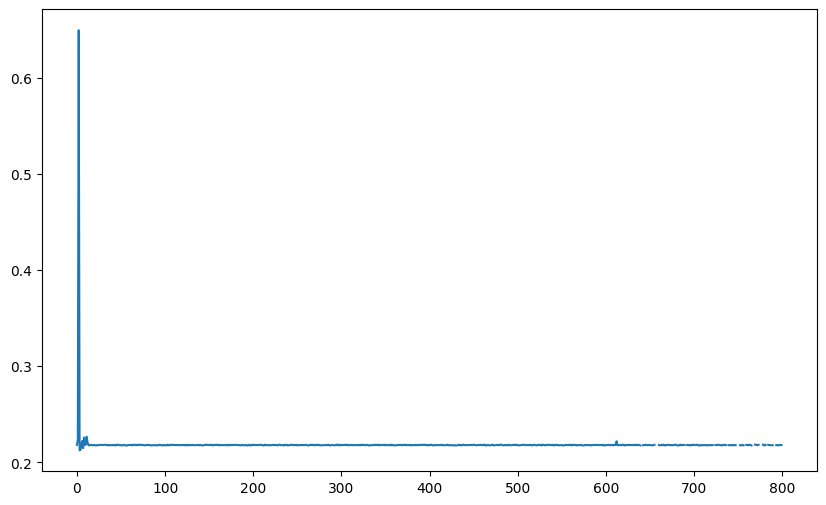

In [64]:
plt.figure(figsize=(10, 6))
t = np.arange(0, len(cost_list))
plt.plot(t, cost_list)
plt.show()